### About Dataset

This dataset encompasses extensive information on crop production in India, spanning multiple years and offering insights into agricultural trends and patterns. The dataset consists of over 246,000 records, capturing a wide array of variables related to crop production, and is intended to facilitate advanced analyses such as predictive modeling and the extraction of key insights for stakeholders in the agri-food sector.

Geographical Scope:

Data is collected across various states and regions of India, reflecting the diverse agricultural landscape of the country. Regional variations in crop production can be analyzed to identify local factors affecting yields

Trend Analysis:

Longitudinal analysis of the data can reveal trends and patterns in crop production, helping to understand how factors such as technological advancements, policy changes, and environmental conditions affect agriculture.

## Import Necessary Libraies

In [62]:
!pip install catboost

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

import warnings

warnings.filterwarnings("ignore")

In [64]:
!wget https://github.com/Abhishek-guptaaa/My_dataset1/raw/refs/heads/main/Crop%20Production%20Data%20India.zip

--2024-09-16 06:29:50--  https://github.com/Abhishek-guptaaa/My_dataset1/raw/refs/heads/main/Crop%20Production%20Data%20India.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Abhishek-guptaaa/My_dataset1/refs/heads/main/Crop%20Production%20Data%20India.zip [following]
--2024-09-16 06:29:50--  https://raw.githubusercontent.com/Abhishek-guptaaa/My_dataset1/refs/heads/main/Crop%20Production%20Data%20India.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2046987 (2.0M) [application/zip]
Saving to: ‘Crop Production Data India.zip.1’

Crop Production Dat 100%[===================>]   1.95M  --.-K

In [65]:
import zipfile

with zipfile.ZipFile('Crop Production Data India.zip', 'r') as zip_ref:
    zip_ref.extractall('data')



In [66]:
df=pd.read_csv(r"/content/data/Crop Production data.csv")

In [67]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Arecanut,1254.0,2000.0
1,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Kharif,Rice,102.0,321.0
3,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Banana,176.0,641.0
4,ANDAMAN AND NICOBAR,NICOBAR ISLANDS,2000,Whole Year,Cashewnut,720.0,165.0


In [68]:
print("Number of Columns:", df.shape[1])
print("Number of Rows:", df.shape[0])

Number of Columns: 7
Number of Rows: 246091


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


### Key Features:

State_Name: Represents the name of the state in India where the crop data was recorded.

District_Name: Specifies the district within the state where the crop data was collected.

Crop_Year: Indicates the year in which the crop was harvested.

Season: Denotes the agricultural season (e.g., Kharif, Rabi) during which the crop was grown.

Crop: Identifies the type of crop that was cultivated.

Area: Represents the total land area used for cultivating the crop.

Production: Indicates the total quantity of the crop produced from the specified area.

In [70]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [71]:
df.dropna(inplace=True)

In [72]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


In [73]:
print("Number of Duplicates: ", df.duplicated().sum())

Number of Duplicates:  0


In [74]:
df.describe()

,Crop_Year,Area,Production
count,242361.000000,2.423610e+05,2.423610e+05
mean,2005.625773,1.216741e+04,5.825034e+05
std,4.958285,5.085744e+04,1.706581e+07
min,1997.000000,1.000000e-01,0.000000e+00
25%,2002.000000,8.700000e+01,8.800000e+01
50%,2006.000000,6.030000e+02,7.290000e+02
75%,2010.000000,4.545000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


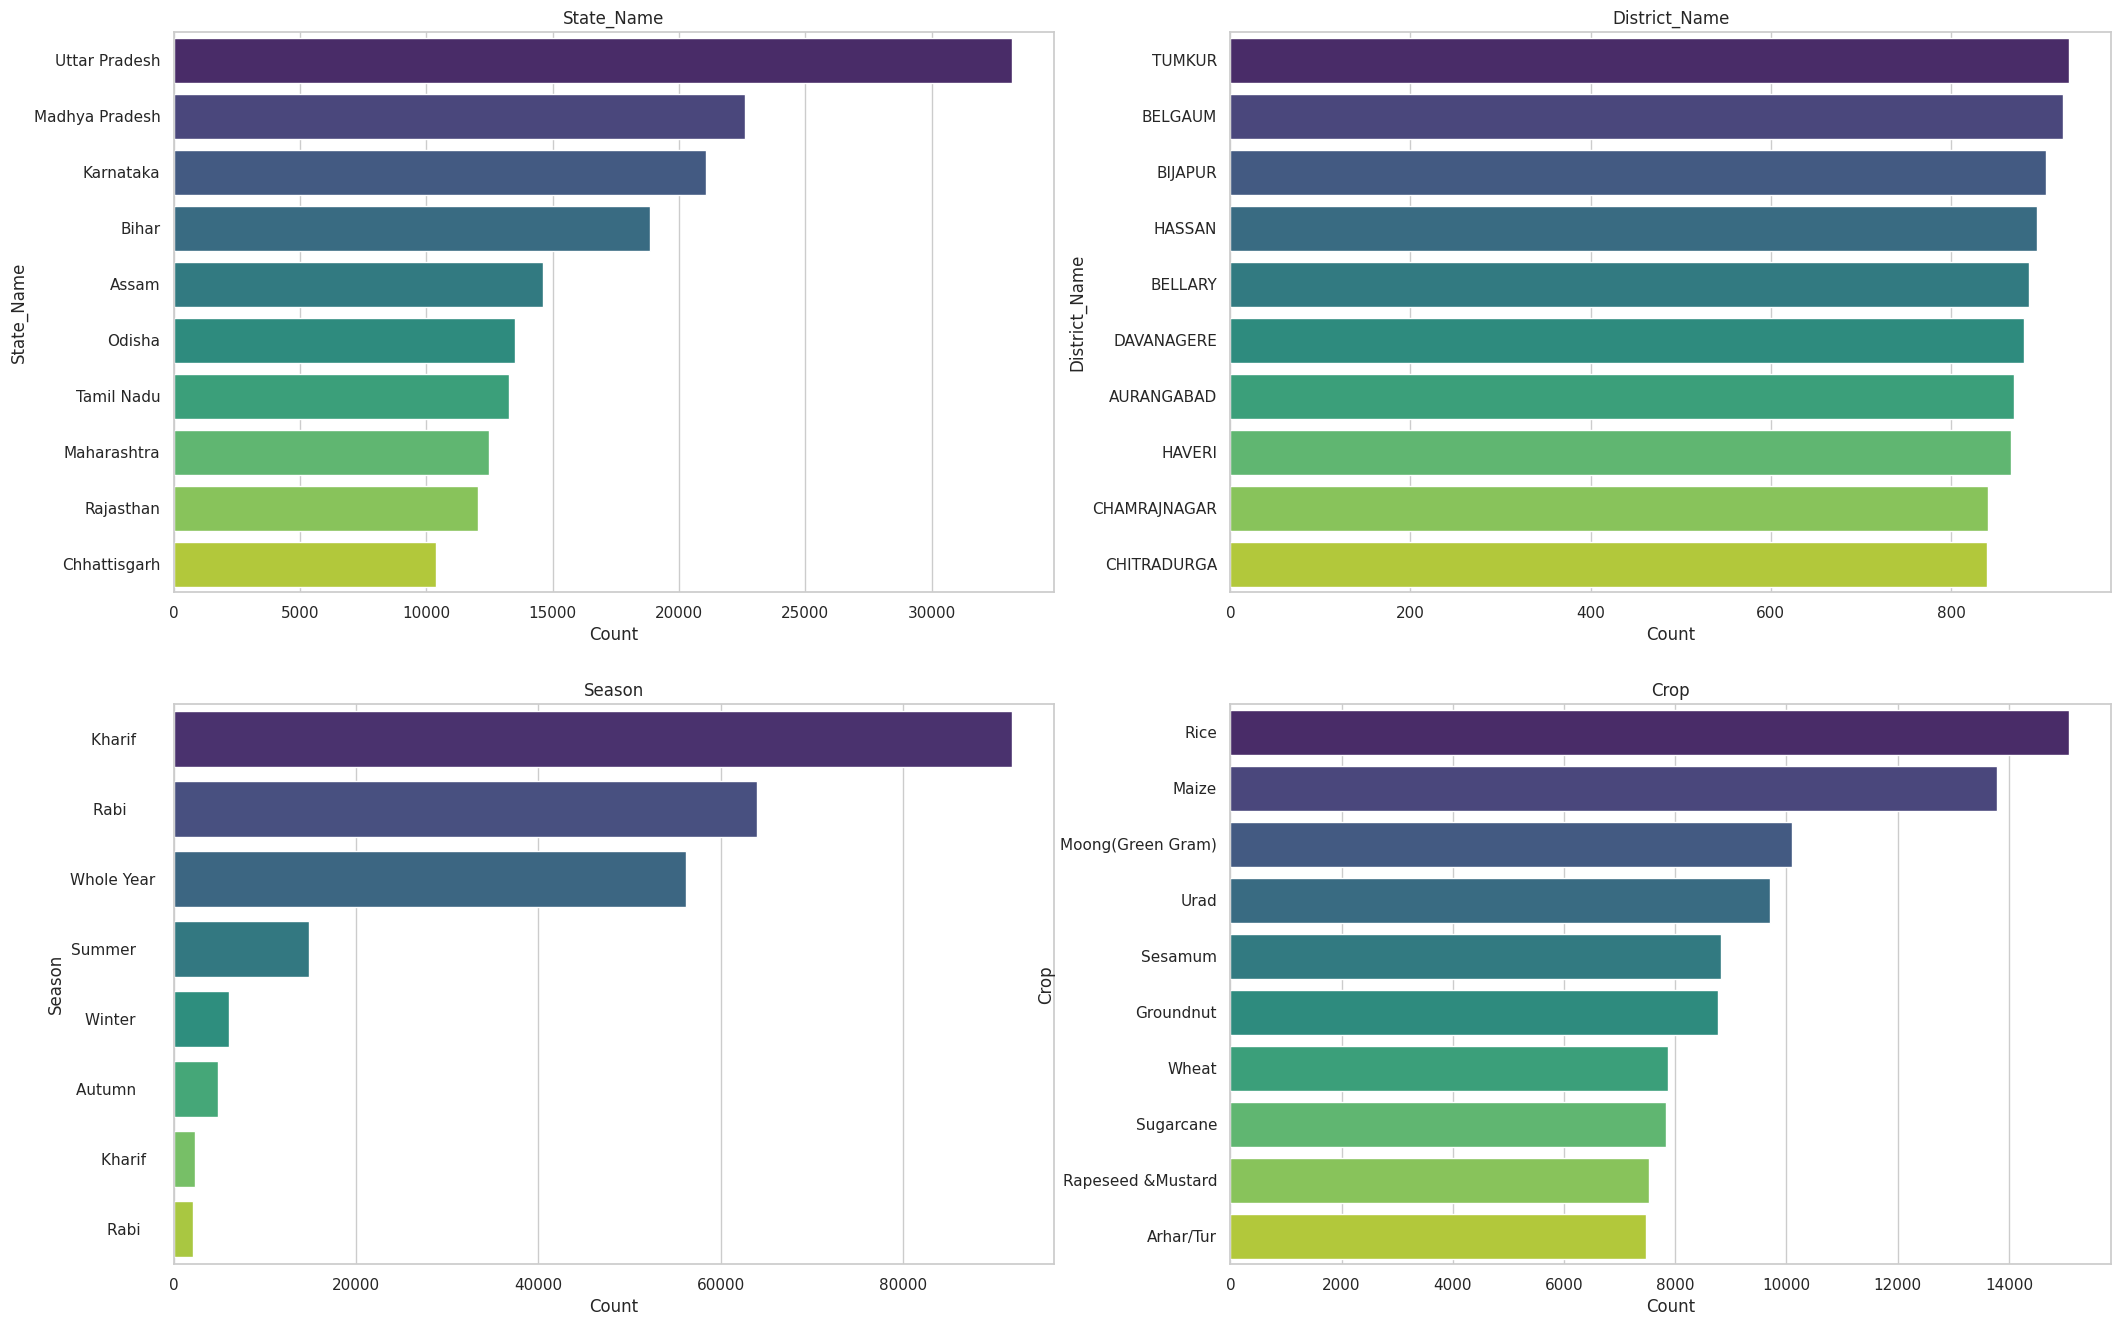

In [75]:
plt.figure(figsize=(25, 16))
for i, feature in enumerate(df.select_dtypes(include="object").columns):
    counts = df[feature].value_counts().head(10)
    plt.subplot(2, 2, i+1)
    sns.barplot(x=counts.values, y=counts.index, palette='viridis')
    plt.title(f"{feature}")
    plt.ylabel(f"{feature}")
    plt.xlabel("Count")
plt.show()

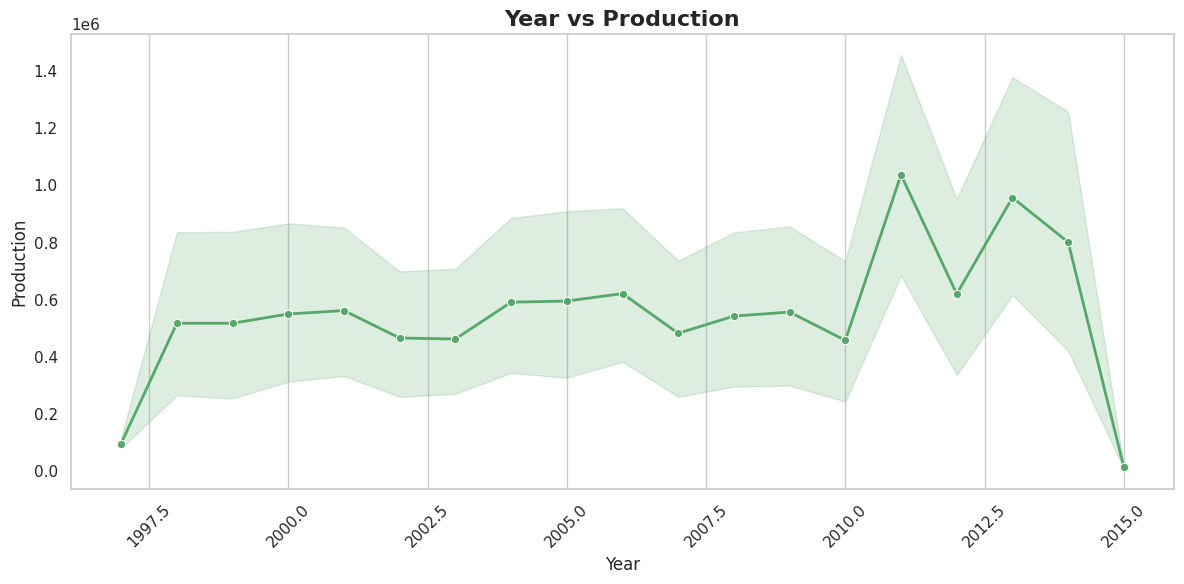

In [76]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='Crop_Year', y='Production', data=df, marker='o', color='g', linewidth=2)

plt.title('Year vs Production', fontsize=16, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Production')

plt.xticks(rotation=45)
plt.yticks()

plt.grid(axis='y')
plt.tight_layout()
plt.show()

State vs Production

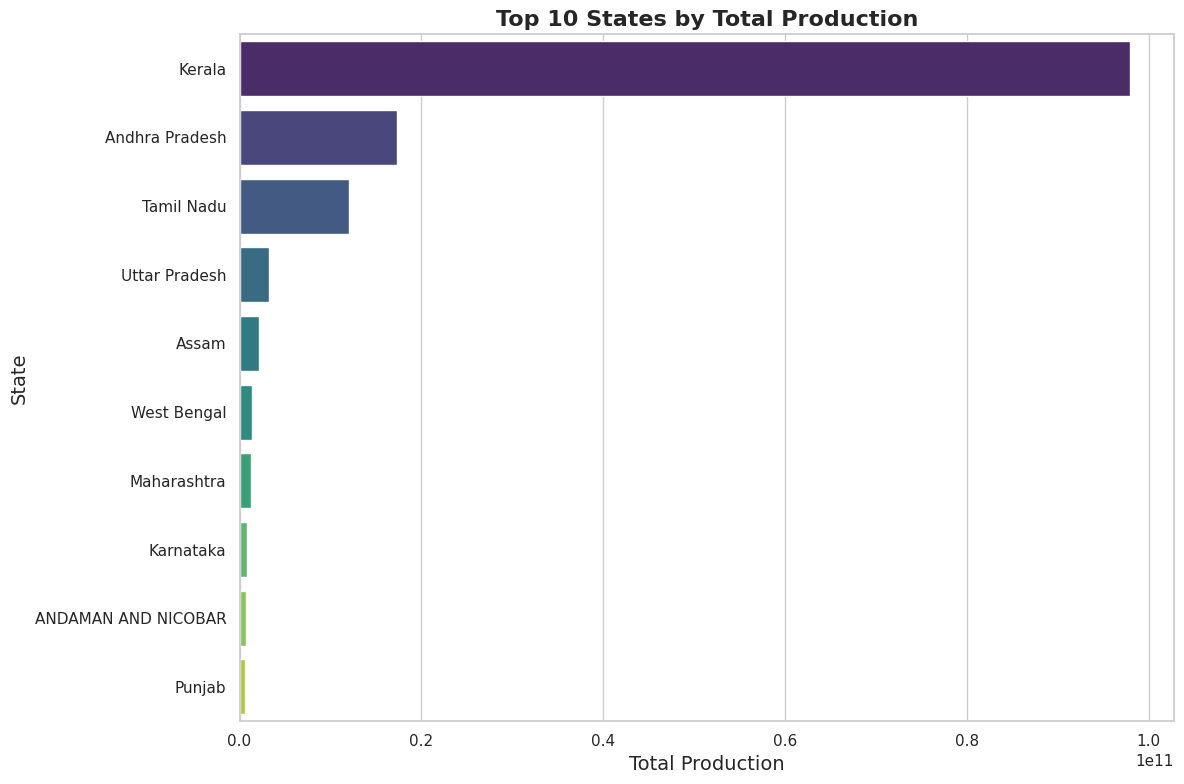

In [77]:
sns.set(style="whitegrid")
state_production = df.groupby('State_Name')['Production'].sum().reset_index()
state_production_sorted = state_production.sort_values(by='Production', ascending=False)
top_10_states = state_production_sorted.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Production', y='State_Name', data=top_10_states, palette='viridis')
plt.title('Top 10 States by Total Production', fontsize=16, fontweight='bold')
plt.xlabel('Total Production', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.tight_layout()
plt.show()

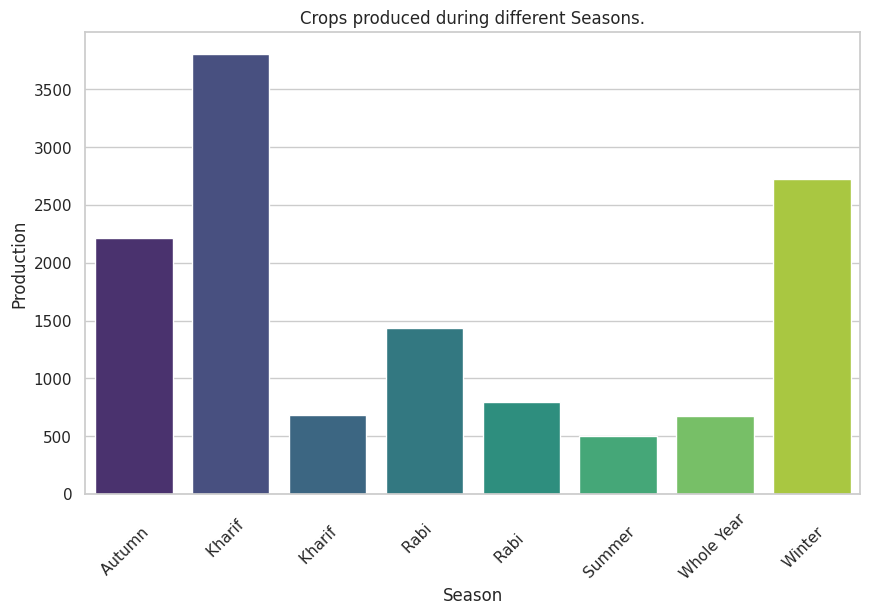

In [78]:
group_by_crop = df.groupby("Season")["Production"].median().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=group_by_crop["Season"], y=group_by_crop["Production"], palette='viridis')
plt.title("Crops produced during different Seasons.")
plt.xlabel("Season")
plt.ylabel("Production")
plt.xticks(rotation=45)
plt.show()

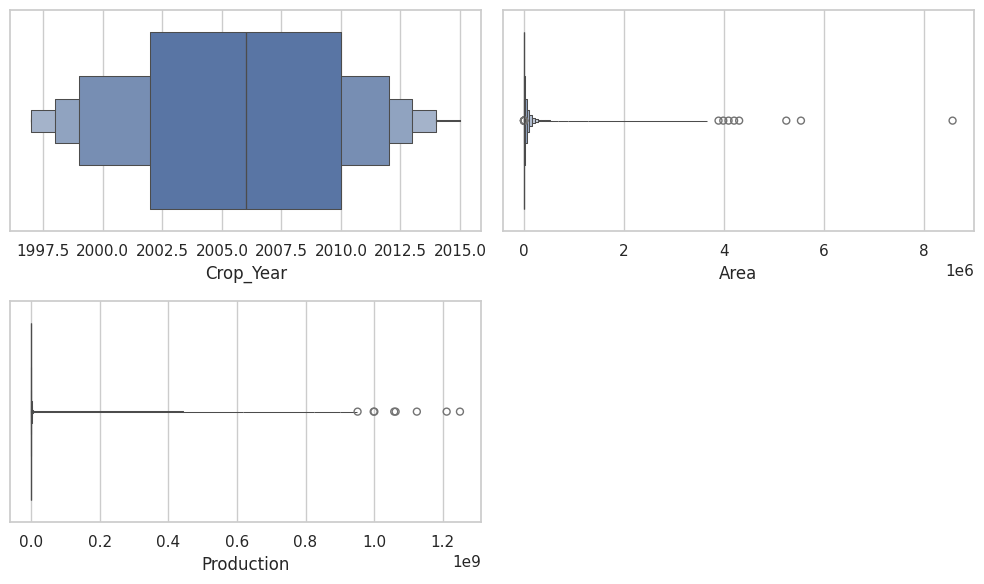

In [79]:
plt.figure(figsize=(10, 6))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(2, 2, i+1)
    sns.boxenplot(data=df, x=feature)
plt.tight_layout()

### Encoding

In [80]:
encoder = LabelEncoder()

df["State_Name"] = encoder.fit_transform(df["State_Name"])
df["District_Name"] = encoder.fit_transform(df["District_Name"])
df["Season"] = encoder.fit_transform(df["Season"])
df["Crop"] = encoder.fit_transform(df["Crop"])

In [81]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,0,418,2000,2,2,1254.0,2000.0
1,0,418,2000,2,74,2.0,1.0
2,0,418,2000,2,97,102.0,321.0
3,0,418,2000,6,7,176.0,641.0
4,0,418,2000,6,22,720.0,165.0


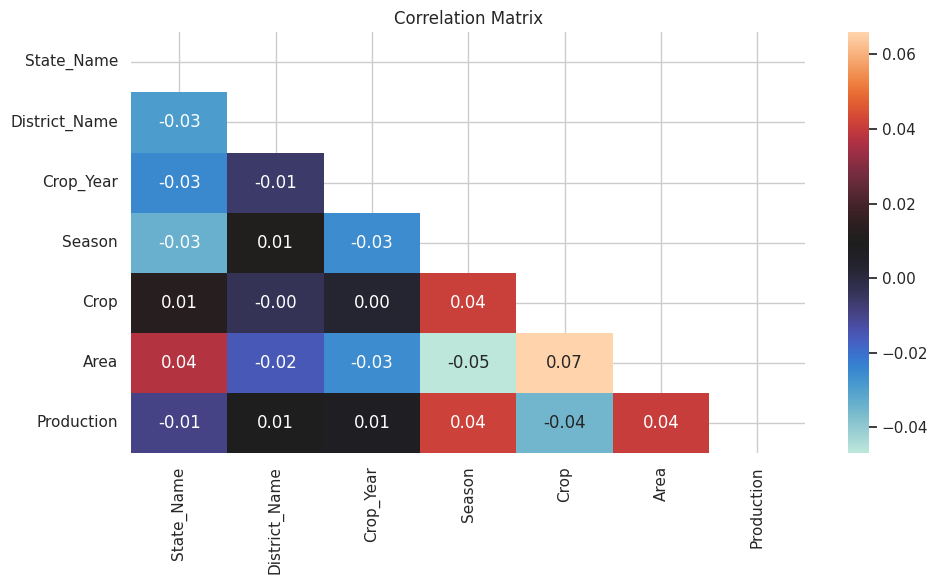

In [82]:
corr = df.corr()
mask_ut = mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="icefire", mask=mask_ut)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

### Outliers Treatment

In [83]:
q1 = df["Area"].quantile(0.25)
q3 = df["Area"].quantile(0.75)
iqr = q3 - q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Area"] > lower_limit) & (df["Area"] < upper_limit)]

### Scaling

In [84]:
X = df.drop("Production", axis=1)
y = df["Production"]

In [85]:
standard_scaler = StandardScaler()

X = standard_scaler.fit_transform(X)

In [86]:
min_max_scaler = MinMaxScaler()

y = np.array(y)

y = min_max_scaler.fit_transform(y.reshape(-1, 1))

In [87]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((161944, 6), (161944, 1), (40486, 6), (40486, 1))

In [88]:
param = {
    'n_estimators': 300,
    'learning_rate': 0.1,
    'max_depth': 7,
    'subsample': 1.0,
    'colsample_bytree': 1.0,
    'gamma': 0
}

reg = XGBRegressor(random_state=42, **param)

In [89]:
reg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

### Evaluation

In [90]:
y_pred = reg.predict(x_test)

In [91]:
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2-score: ", f"{(r2_score(y_test, y_pred) * 100):0.1f}", "%")

MAE:  0.00011007623237860008
MSE:  5.665328374001729e-06
R2-score:  92.1 %


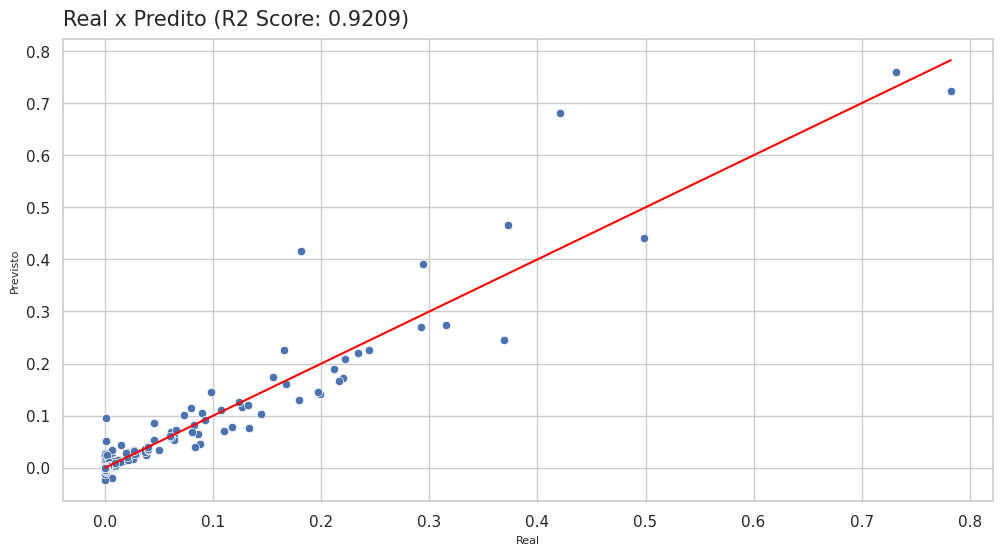

In [92]:
fig, ax = plt.subplots(figsize = (12, 6))

y_test = y_test.flatten() if hasattr(y_test, "flatten") else y_test
y_pred = y_pred.flatten() if hasattr(y_pred, "flatten") else y_pred

sns.scatterplot(x = y_test, y = y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red')
ax.set_title(f"Real x Predito (R2 Score: {r2_score(y_test, y_pred):.4f})", fontsize = 15, pad = 10, loc = 'left')
ax.set_xlabel("Real", fontsize = 8)
ax.set_ylabel("Previsto", fontsize = 8)
plt.show()